## 1. Data Preprocessing

### 1.1 Importing Data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
def import_csv(file_path):
    """Import a CSV file and return a pandas DataFrame."""
    df = pd.read_csv(file_path)
    return df

In [8]:
def import_csv_and_split_by_year(file_path):
    """Import a CSV file, split it by year and return a dictionary of DataFrames."""
    df = pd.read_csv(file_path, dtype=str)
    df['Reporting Date'] = pd.to_datetime(df['Reporting Date'], format='%d-%b-%y')
    df['year'] = df['Reporting Date'].dt.year

    years = df['year'].unique()
    print(f'There are {len(years)} unique years: {years}')

    for year in years:
        globals()[f'df_{year}'] = df[df['year'] == year]
        print(f'Year {year} has {len(globals()[f"df_{year}"])} rows')

import_csv_and_split_by_year("Job_History.csv")

There are 7 unique years: [2022 2021 2023 2024 2020 2019 2018]
Year 2022 has 125110 rows
Year 2021 has 107232 rows
Year 2023 has 143129 rows
Year 2024 has 51388 rows
Year 2020 has 89780 rows
Year 2019 has 71174 rows
Year 2018 has 13695 rows


In [17]:
print(df_2024.tail(10))

       Reporting Date Person ID Employee Status Employee Class  \
601498     2024-04-01    128214          Active      Workforce   
601499     2024-04-01    128227          Active      Workforce   
601500     2024-04-01    128228          Active      Workforce   
601501     2024-04-01    128242          Active      Workforce   
601502     2024-04-01    128243          Active      Workforce   
601503     2024-04-01    128247          Active      Workforce   
601504     2024-04-01    128255          Active      Workforce   
601505     2024-04-01    128256          Active      Workforce   
601506     2024-04-01    128263          Active      Workforce   
601507     2024-04-01    128297          Active      Workforce   

           Employment Type Company (externalCode)   Company (Label)  \
601498  Full-Time Employee                    400  John Holland P/L   
601499  Full-Time Employee                    400  John Holland P/L   
601500  Full-Time Employee                    400  John Holl

In [39]:
print(df_2024.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51388 entries, 8341 to 601507
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Reporting Date                         51388 non-null  datetime64[ns]
 1   Person ID                              51388 non-null  object        
 2   Employee Status                        51388 non-null  object        
 3   Employee Class                         51388 non-null  object        
 4   Employment Type                        51388 non-null  object        
 5   Company (externalCode)                 51388 non-null  object        
 6   Company (Label)                        51388 non-null  object        
 7   Division (Code)                        51388 non-null  object        
 8   Division                               51388 non-null  object        
 9   Subdivision (Code)                     51388 non-null  object 

In [28]:
print(df_2024['Person ID'].value_counts())

Person ID
29152     4
113849    4
116487    4
117618    4
118372    4
         ..
127701    1
111588    1
111288    1
61397     1
128108    1
Name: count, Length: 12945, dtype: int64


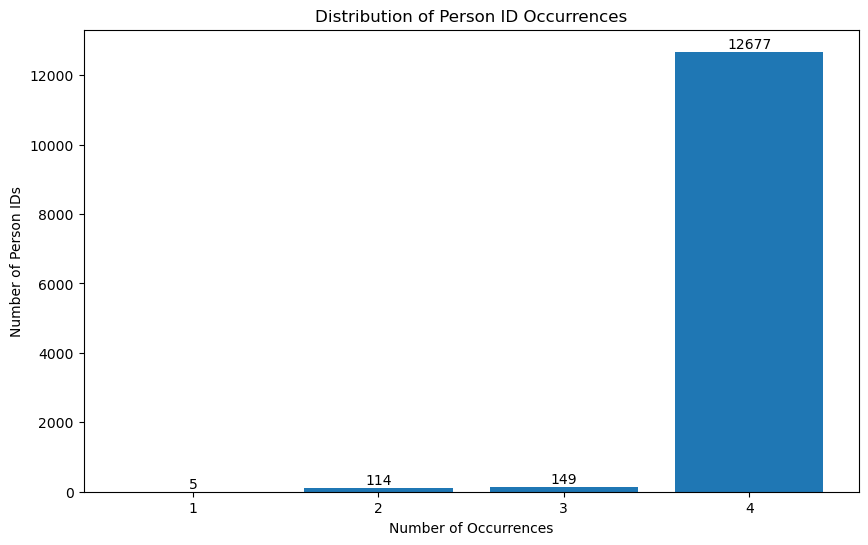

In [31]:
# Calculate the counts
counts = df_2024['Person ID'].value_counts()

# Plot the histogram
plt.figure(figsize=(10,6))
hist = plt.hist(counts, bins=range(1, counts.max()+2), align='left', rwidth=0.8)

# Add text
for i in range(len(hist[0])):
    plt.text(hist[1][i],hist[0][i],str(int(hist[0][i])), ha='center', va='bottom')

plt.xticks(range(1, counts.max()+1)) 
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Person IDs')
plt.title('Distribution of Person ID Occurrences')
plt.show()

In [41]:
# Ensure 'Reporting Date' is datetime type
df_2024['Reporting Date'] = pd.to_datetime(df_2024['Reporting Date'])

# Filter rows
active_2024 = df_2024[(df_2024['Reporting Date'] == '2024-04-01') & (df_2024['Employee Status'] == 'Active')]

In [42]:
print(active_2024.head())
print(active_2024.shape[0])

       Reporting Date Person ID Employee Status Employee Class  \
588574     2024-04-01     10390          Active          Staff   
588575     2024-04-01     10833          Active          Staff   
588577     2024-04-01     11586          Active          Staff   
588578     2024-04-01     11587          Active          Staff   
588580     2024-04-01     12182          Active          Staff   

           Employment Type Company (externalCode)     Company (Label)  \
588574  Full-Time Employee                    100  John Holland Group   
588575  Full-Time Employee                    100  John Holland Group   
588577  Full-Time Employee                    100  John Holland Group   
588578  Full-Time Employee                    100  John Holland Group   
588580  Full-Time Employee                    100  John Holland Group   

       Division (Code)          Division Subdivision (Code)  ... Placements  \
588574             RAL  Rail & Transport              RALPR  ...        NaN   
588575

In [43]:
manager_data = import_csv("Job_History_Manager_Change.csv")
print(manager_data.head(10))

   Event Date Event Month  Person ID Gender Employee Status (Picklist Label)  \
0  18/10/2018  31/10/2018       7417      M                           Active   
1  17/03/2020  31/03/2020       7417      M                           Active   
2  28/03/2020  31/03/2020       7417      M                           Active   
3  15/06/2020  30/06/2020       7417      M                           Active   
4  23/07/2020  31/07/2020       7417      M                           Active   
5  30/07/2020  31/07/2020       7417      M                           Active   
6  10/08/2020  31/08/2020       7417      M                           Active   
7  31/08/2020  31/08/2020       7417      M                           Active   
8  28/10/2021  31/10/2021       7417      M                           Active   
9  18/10/2018  31/10/2018       8129      M                           Active   

  Employee Class (Picklist Label) Employment Type (Picklist Label)  \
0                           Staff               F

In [46]:
print(manager_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55285 entries, 0 to 55284
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Event Date                        55285 non-null  datetime64[ns]
 1   Event Month                       55285 non-null  object        
 2   Person ID                         55285 non-null  int64         
 3   Gender                            53559 non-null  object        
 4   Employee Status (Picklist Label)  55285 non-null  object        
 5   Employee Class (Picklist Label)   55285 non-null  object        
 6   Employment Type (Picklist Label)  55285 non-null  object        
 7   Division                          55285 non-null  object        
 8   Subdivision (Label)               55285 non-null  object        
 9   Department Name                   55285 non-null  object        
 10  JH Job Family (Label)             55285 non-nu

In [47]:
# Filter rows where 'Supervisor ID' is null
null_supervisor_id = manager_data[manager_data['Supervisor ID'].isnull()]

# Print these rows
print(null_supervisor_id)

      Event Date Event Month  Person ID Gender  \
2287  2023-07-13  31/07/2023      27835      M   
29998 2021-04-01  30/04/2021     111430      F   
31585 2022-10-28  31/10/2022     112227      F   

      Employee Status (Picklist Label) Employee Class (Picklist Label)  \
2287                            Active                           Staff   
29998                           Active                           Staff   
31585                       Terminated                           Staff   

      Employment Type (Picklist Label)                     Division  \
2287                Full-Time Employee               Building Group   
29998               Part-Time Employee               Infrastructure   
31585               Full-Time Employee  Infrastructure VIC/SA & TAS   

                      Subdivision (Label)                 Department Name  \
2287                   Building Overheads        Building Project Support   
29998  Infrastructure Projects VIC/SA/TAS  North Western Progra

In [44]:
# Ensure 'event date' is datetime type
manager_data['Event Date'] = pd.to_datetime(manager_data['Event Date'], format='%d/%m/%Y')

# Get the index of the latest date for each 'person id'
idx = manager_data.groupby('Person ID')['Event Date'].idxmax()

# Select the rows with these indices
latest_manager_data = manager_data.loc[idx]
print(latest_manager_data.head(10))

   Event Date Event Month  Person ID Gender Employee Status (Picklist Label)  \
8  2021-10-28  31/10/2021       7417      M                           Active   
17 2021-05-31  31/05/2021       8129      M                           Active   
21 2020-08-22  31/08/2020      10009      M                           Active   
29 2022-04-01  30/04/2022      10058      M                           Active   
38 2023-11-01  30/11/2023      10066      M                           Active   
50 2023-07-10  31/07/2023      10074      M                           Active   
52 2019-07-05  31/07/2019      10076      M                           Active   
65 2023-10-19  31/10/2023      10079      M                           Active   
74 2024-01-11  31/01/2024      10087      M                           Active   
78 2020-07-13  31/07/2020      10103      M                           Active   

   Employee Class (Picklist Label) Employment Type (Picklist Label)  \
8                            Staff              

In [49]:
# Convert 'Person ID' columns to string
active_2024.loc[:, 'Person ID'] = active_2024['Person ID'].astype(str)
latest_manager_data.loc[:, 'Person ID'] = latest_manager_data['Person ID'].astype(str)

# Merge active_2024 and latest_manager_data on 'Person ID'
merged_2024 = active_2024.merge(latest_manager_data[['Person ID', 'Supervisor ID']], on='Person ID', how='left')

In [51]:
print(merged_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Reporting Date                         5955 non-null   datetime64[ns]
 1   Person ID                              5955 non-null   object        
 2   Employee Status                        5955 non-null   object        
 3   Employee Class                         5955 non-null   object        
 4   Employment Type                        5955 non-null   object        
 5   Company (externalCode)                 5955 non-null   object        
 6   Company (Label)                        5955 non-null   object        
 7   Division (Code)                        5955 non-null   object        
 8   Division                               5955 non-null   object        
 9   Subdivision (Code)                     5955 non-null   object  

In [52]:
print(merged_2024.head(10))

  Reporting Date Person ID Employee Status Employee Class     Employment Type  \
0     2024-04-01     10390          Active          Staff  Full-Time Employee   
1     2024-04-01     10833          Active          Staff  Full-Time Employee   
2     2024-04-01     11586          Active          Staff  Full-Time Employee   
3     2024-04-01     11587          Active          Staff  Full-Time Employee   
4     2024-04-01     12182          Active          Staff  Full-Time Employee   
5     2024-04-01     12189          Active          Staff  Full-Time Employee   
6     2024-04-01     12276          Active          Staff  Full-Time Employee   
7     2024-04-01     12355          Active          Staff  Full-Time Employee   
8     2024-04-01     14334          Active          Staff  Full-Time Employee   
9     2024-04-01     14775          Active          Staff  Full-Time Employee   

  Company (externalCode)     Company (Label) Division (Code)  \
0                    100  John Holland Group

In [57]:
# Verify rows where 'Person ID' is '10390'
person_id_10390 = latest_manager_data[latest_manager_data['Person ID'] == '10390']
print(person_id_10390)

    Event Date Event Month Person ID Gender Employee Status (Picklist Label)  \
135 2021-08-09  31/08/2021     10390      M                           Active   

    Employee Class (Picklist Label) Employment Type (Picklist Label)  \
135                           Staff               Full-Time Employee   

           Division                 Subdivision (Label)  \
135  Infrastructure  Infrastructure Projects VIC/SA/TAS   

                               Department Name JH Job Family (Label)  \
135  Metro Tunnel Rail Infrastructure Alliance    Technical & Design   

    JH Position Title (Label)  External Title Supervisor ID  \
135            Senior Planner  Senior Planner         60209   

     Diversity Question  
135                 1.0  


## 2. Exploratory Data Analysis

## 3. Social Network Analysis